In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#save file path to Variable 
File ="CA_Merged_data.csv"

#Read the CSV into Pandas Dataframe 
youtube_df = pd.read_csv(File) 

#"US_youtube_trending_data.csv")

youtube_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName
0,0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,6180.0,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Music
1,1,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23252.0,1856.0,7648.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
2,2,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070.0,714295.0,15176.0,31048.0,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,Music
3,3,2avPJ9TZNmU,Juice WRLD & The Weeknd - Smile (Official Video),2020-08-11T18:03:12Z,UC0BletW9phE4xHFM44q4qKA,Juice WRLD,10,2020-08-12T00:00:00Z,JuiceWRLD|juiceworld|juice world|juice wrld|999,2228821.0,289403.0,1720.0,25136.0,https://i.ytimg.com/vi/2avPJ9TZNmU/default.jpg,False,False,Juice WRLD & The Weeknd - Smile is available n...,Music
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885.0,353336.0,9763.0,23405.0,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music


In [3]:
df_cleaned = youtube_df[['video_id','view_count','likes','dislikes','comment_count','trending_date','categoryId','categoryName']].sort_values(['video_id','trending_date','view_count'],ascending=False).drop_duplicates(subset="video_id")
df_cleaned.head()

,video_id,view_count,likes,dislikes,comment_count,trending_date,categoryId,categoryName
9030,zzk09ESX7e0,9137783.0,567021.0,3304.0,75379.0,2021-06-08T00:00:00Z,10,Music
6159,zzd4ydafGR0,13974461.0,728439.0,7579.0,57012.0,2021-02-21T00:00:00Z,10,Music
62915,zzEblS1lEvU,171649.0,2552.0,71.0,245.0,2021-01-04T00:00:00Z,17,Sports
31466,zyrJ0j7x9-4,1243504.0,41623.0,1476.0,4911.0,2020-08-30T00:00:00Z,20,Gaming
11521,zyebS_kRoEc,1786638.0,160552.0,2359.0,2023.0,2021-09-07T00:00:00Z,10,Music


In [4]:
# Rename the headers to be more explanatory
renamed_df = df_cleaned.rename(columns={"video_id": "Video ID",
                                        "view_count": "View Count",
                                        "likes":"Likes",
                                        "dislikes": "Dislikes",
                                        "comment_count": "Comment Count",
                                        "trending_date": "Trending Date",
                                        "categoryId": "Category ID",
                                        "categoryName": "Category Name",})
renamed_df.head()

,Video ID,View Count,Likes,Dislikes,Comment Count,Trending Date,Category ID,Category Name
9030,zzk09ESX7e0,9137783.0,567021.0,3304.0,75379.0,2021-06-08T00:00:00Z,10,Music
6159,zzd4ydafGR0,13974461.0,728439.0,7579.0,57012.0,2021-02-21T00:00:00Z,10,Music
62915,zzEblS1lEvU,171649.0,2552.0,71.0,245.0,2021-01-04T00:00:00Z,17,Sports
31466,zyrJ0j7x9-4,1243504.0,41623.0,1476.0,4911.0,2020-08-30T00:00:00Z,20,Gaming
11521,zyebS_kRoEc,1786638.0,160552.0,2359.0,2023.0,2021-09-07T00:00:00Z,10,Music


In [5]:
renamed_df.to_csv("NewUS_clean.csv",
    encoding="utf-8", index=False,header=True)

In [6]:
categoryGroup = renamed_df.groupby(["Category Name"])


categorySum_df=categoryGroup.sum()

categorySum_df.head()

,View Count,Likes,Dislikes,Comment Count,Category ID
Category Name,,,,,
Autos & Vehicles,4.651076e+08,17759393.0,380428.0,1429100.0,716
Comedy,2.743370e+09,162819948.0,3633282.0,7567147.0,23460
Education,8.487432e+08,41503343.0,803976.0,2728246.0,11556
Entertainment,1.200219e+10,580588820.0,13084335.0,34506796.0,83616
Film & Animation,1.321882e+09,58231844.0,1087812.0,4389411.0,522


In [7]:
vc_total=df_cleaned.groupby(["view_count"])
vc_total_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
vc_total_df = vc_total_df.drop(index=['Category ID', 'Category Name'])
vc_total_df

,Values
View Count,51527166192.0
Likes,2598036983.0
Dislikes,58916917.0
Comment Count,212047622.0


In [8]:
viewcount=df_cleaned.groupby(["view_count"])
viewcount_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
viewcount_df = vc_total_df.drop(index=['Comment Count'])
viewcount_df

,Values
View Count,51527166192.0
Likes,2598036983.0
Dislikes,58916917.0


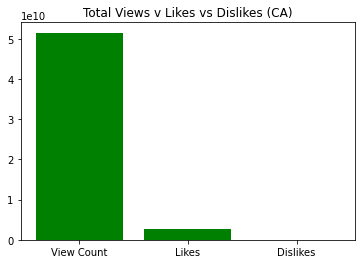

In [9]:
plt.bar(viewcount_df.index.values,viewcount_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Views v Likes vs Dislikes (CA)")
#plt.grid()
plt.show()

In [10]:
comments=df_cleaned.groupby(["comment_count"])
comments_df= pd.DataFrame(renamed_df.sum(),columns=['Values'])
comments_df = vc_total_df.drop(index=['View Count'])
comments_df

,Values
Likes,2598036983.0
Dislikes,58916917.0
Comment Count,212047622.0


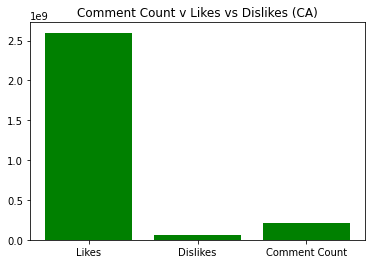

In [11]:
plt.bar(comments_df.index.values,comments_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Comment Count v Likes vs Dislikes (CA)")
#plt.grid()
plt.show()

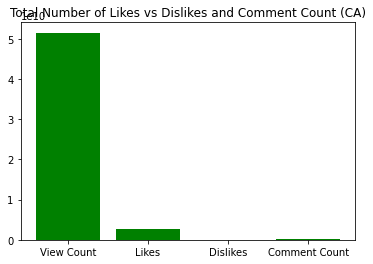

In [12]:
plt.bar(vc_total_df.index.values,vc_total_df['Values'],color="Green")

plt.ylabel("")
plt.xlabel("")
plt.title("Total Number of Likes vs Dislikes and Comment Count (CA)")
#plt.grid()
plt.show()

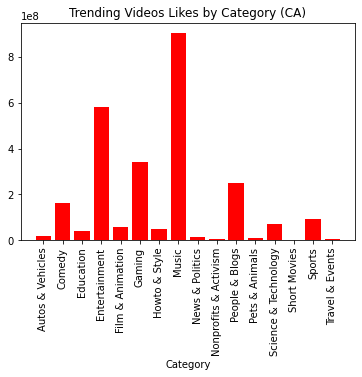

In [13]:
plt.bar(categorySum_df.index.values,categorySum_df["Likes"], color="red")
plt.ylabel("")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Likes by Category (CA)")
#plt.grid()
#plt.ylim([0,])
plt.show()

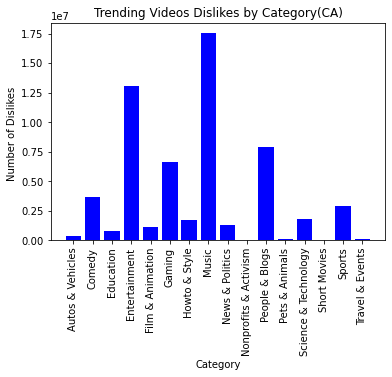

In [14]:
plt.bar(categorySum_df.index.values,categorySum_df["Dislikes"], color="Blue")
plt.ylabel("Number of Dislikes ")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Dislikes by Category(CA)")
#plt.grid()
#plt.ylim([0,])
plt.show()

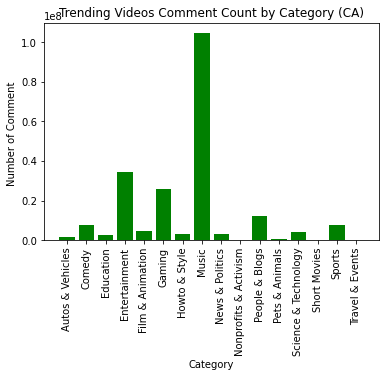

In [15]:
plt.bar(categorySum_df.index.values,categorySum_df["Comment Count"], color="Green")
plt.ylabel("Number of Comment ")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.title("Trending Videos Comment Count by Category (CA)")
#plt.grid()
#plt.ylim([0,])
plt.show()



In [16]:
y =categorySum_df['View Count'] 
x =categorySum_df['Likes'] 



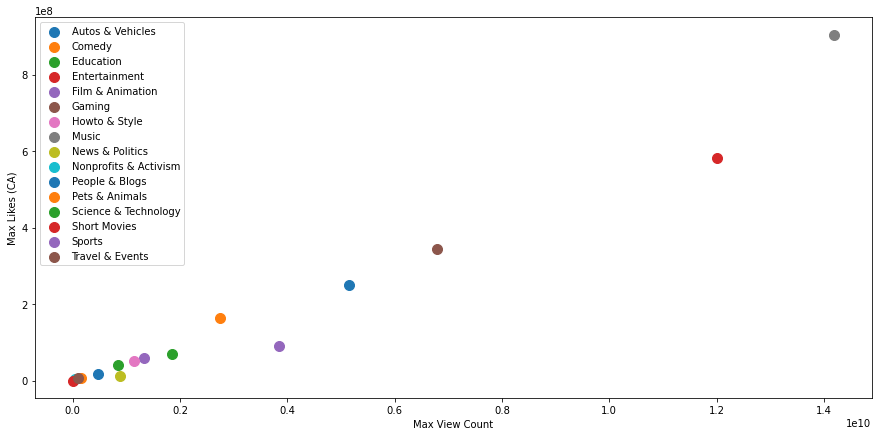

In [17]:
plt.figure(figsize = (15,7))
# plt.scatter(x,y,c=categorySum_df.index.values)
#plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black"
#           )
for ticker,row in categorySum_df.iterrows():
  plt.scatter(row['View Count'], row['Likes'], label=ticker, s=100)
plt.xlabel("Max View Count")
plt.ylabel("Max Likes (CA)")
plt.legend(loc='best')
    
plt.show()



In [18]:
y =categorySum_df['View Count']
x =categorySum_df['Dislikes']

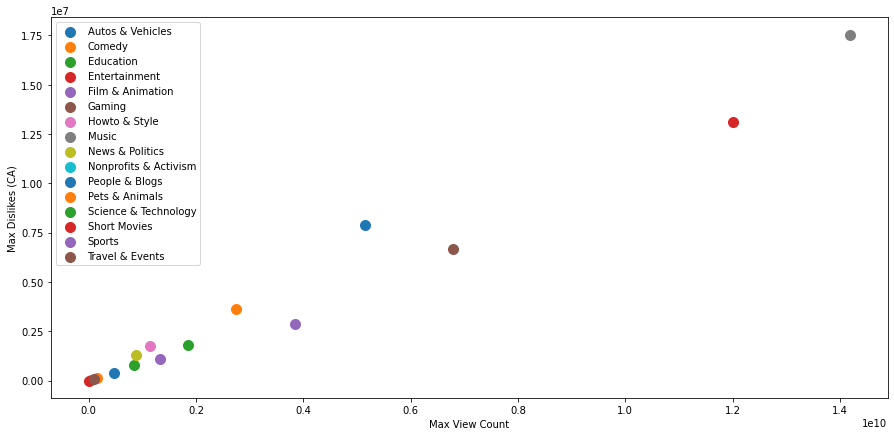

In [19]:

plt.figure(figsize = (15,7))
for ticker,row in categorySum_df.iterrows():
  plt.scatter(row['View Count'], row['Dislikes'], label=ticker, s=100)
plt.xlabel("Max View Count")
plt.ylabel("Max Dislikes (CA)")
plt.legend(loc='best')
    
plt.show()

Text(0.5, 1.0, 'Canada')

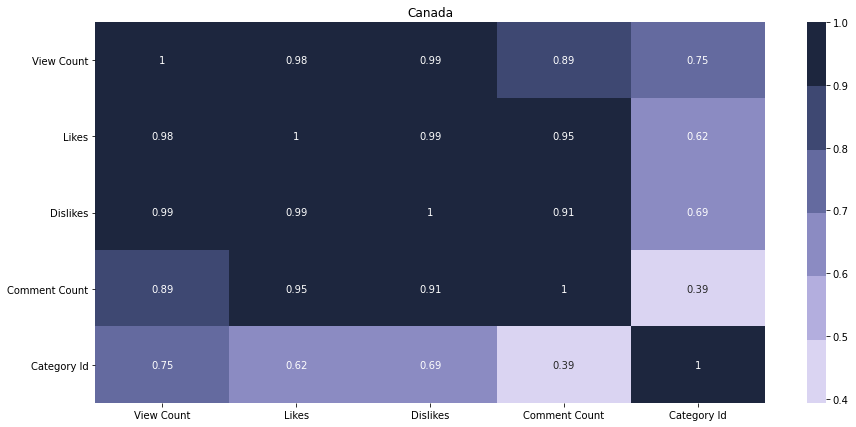

In [20]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(categorySum_df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,7))
_ = sns.heatmap(categorySum_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(start=2.8, rot=.1))

ax.set_title('Canada')
#Youtube Trending video analysis:

#This shows how and if the variables in a dataset correlate/relationship with one another.The table on the right show has a scale of 
 #  0.4being the lowest correlation  to 1.0 being the strongest correlation to another. We can see that views and likes  are strongly correlated to one another.
    


In [21]:
# Who has the highest amount of View count, Likes , Dislikes

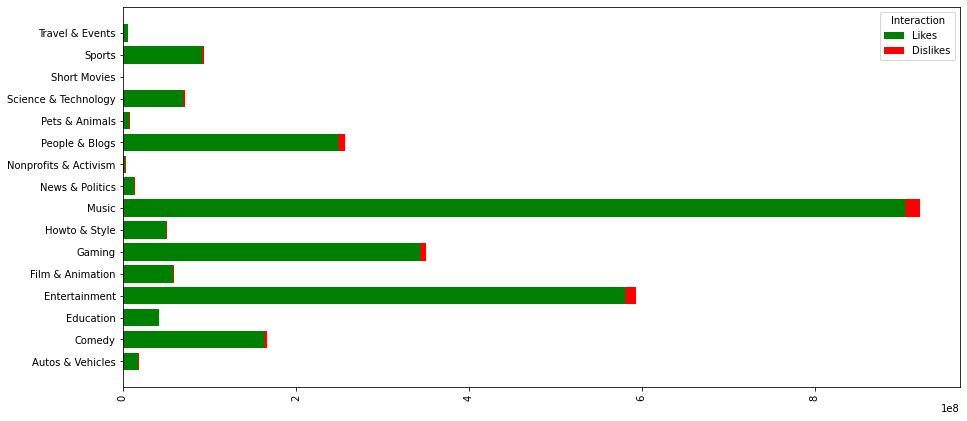

In [22]:

y1 =categorySum_df['Likes']
y2 =categorySum_df['Dislikes']

x=categorySum_df.index.values
  
# plot bars in stack manner
plt.figure(figsize = (15,7))
plt.xticks(rotation=90)
b1 = plt.barh(x,y1, color="green")
b2 = plt.barh(x, y2, left=y1, color="red")
plt.legend([b1, b2], ["Likes", "Dislikes"], title="Interaction", loc="upper right")